# Data summarization evaluation

1. From the dataset D create train dataset D1 (90%) and test dataset D0 (10%)
2. Train model (M1) on the dataset (D1)

3. Generate a summarization dataset from D1 and M1 using some technique (D2i) with i: 25%, 50%, 75% of data

4. Train a new model (M2i) on D2i. Identify a new set of best hyperparameters
    
5. Compare M1 and M2i
    1. Compare errors of M1 and M2i on the complete dataset D1.
    2. Compare errors M1 and M2i on D1\D2i
    3. Compare errors on the test dataset (D0)
    4. (Compare feature importance vectors for individual data points from M1 and M2i)

In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import json
import string

import pandas as pd
import numpy as np
import diversipy

from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from graphviz import Digraph

from utils.misc import *



In [2]:
dataset_name = 'ccpp'

In [3]:
D = pd.read_csv('datasets/{}.csv'.format(dataset_name))
D.drop_duplicates(inplace=True)

## 1. From the dataset D create train dataset D1 (90%) and test dataset D0 (10%)

In [4]:
D1, D0 = train_test_split(D, test_size = 0.1)

## 2. Train model (M1) on the dataset (D1)

In [5]:
job1 = train(dataset_name, D1)

session: job_vpvjv	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplqu_tm_n --config /tmp/tmpt3n3cor2 --output /tmp/tmplqs0kvld --persist /tmp/tmpq5yo8syb


In [6]:
job1.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplqu_tm_n --config /tmp/tmpt3n3cor2 --output /tmp/tmplqs0kvld --persist /tmp/tmpq5yo8syb (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:08 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplqu_tm_n --config /tmp/tmpt3n3cor2 --output /tmp/tmplqs0kvld --persist /tmp/tmpq5yo8syb 2021-03-05 14:08:18,239730 UTC [587] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:08:18,239804 UTC [587] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:08:18,239823 UTC [587] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:08:18,241453 UTC [587] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:08:18,248997 UTC [587] DEBUG CDataFrameAnalyzer.cc@104 Received 8574 rows 2021-03-05 14:09:24,175228 UTC [587] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:09:30,713115 UTC [587] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":27035131} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":12106038} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":71440} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":273} ] 2021-03-05 14:09:30,713173 UTC [587] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:09 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":447.4771423339844 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":433.3771362304687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":482.2739562988281 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.3952026367187 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.8197021484375 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":433.4415893554687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":443.3666381835937 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":459.1535034179687 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


True

## 3. Generate a summarization dataset from D1 and M1 using some technique (D2i) with i: 25%, 50%, 75% of data

In [7]:
D2 = {}
for i in [0.25, 0.5, 0.75]:
    D2[i] = summarize(dataset_name=dataset_name, dataset=D1, size=i, model=job1.model)

## 4. Train a new model (M2i) on D2i

In [8]:
jobs2 = {}
for fraction,D2i in D2.items():
    job = train(dataset_name, D2i) 
    job.wait_to_complete()
    jobs2[fraction] = job

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpz5b13cx6 --config /tmp/tmpa1osvldi --output /tmp/tmpea37n9ls --persist /tmp/tmpbz1ymf_a (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:10 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpz5b13cx6 --config /tmp/tmpa1osvldi --output /tmp/tmpea37n9ls --persist /tmp/tmpbz1ymf_a 2021-03-05 14:10:30,765787 UTC [14210] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:10:30,765833 UTC [14210] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:10:30,765847 UTC [14210] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:10:30,766250 UTC [14210] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:10:30,772242 UTC [14210] DEBUG CDataFrameAnalyzer.cc@104 Received 6430 rows 2021-03-05 14:11:11,571567 UTC [14210] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:11:16,476417 UTC [14210] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":25708036} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":9462861} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":44528} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":250} ] 2021-03-05 14:11:16,476464 UTC [14210] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:11 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":441.6195983886719 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":432.2249145507812 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":464.4483947753906 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":448.7193908691406 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":466.0024108886719 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.8018188476562 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":440.9210205078125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":433.9494323730469 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


## 5. Compare M1 and M2i

### A. Compare errors of M1 and M2i on the complete dataset D1.

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp5h6mv3f4 --config /tmp/tmp3ab5g5no --output /tmp/tmpcgsbbfy3 --restore /tmp/tmpdq7o9io_ (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:11 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp5h6mv3f4 --config /tmp/tmp3ab5g5no --output /tmp/tmpcgsbbfy3 --restore /tmp/tmpdq7o9io_ 2021-03-05 14:11:32,894702 UTC [21755] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:11:32,894764 UTC [21755] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:11:32,894780 UTC [21755] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:11:32,895243 UTC [21755] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:11:32,902867 UTC [21755] DEBUG CDataFrameAnalyzer.cc@104 Received 8574 rows 2021-03-05 14:11:34,530504 UTC [21755] DEBUG CStateDecompressor.cc@168 Explicit end-of-stream marker found in document with index 1 2021-03-05 14:11:38,048881 UTC [21755] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:11:39,549363 UTC [21755] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":27035131} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":15419603} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":5604} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":250} ] 2021-03-05 14:11:39,549407 UTC [21755] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:11 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":448.3068542480469 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":434.8985595703125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":482.3186340332031 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.7306518554687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.8402709960937 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":432.5671691894531 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":443.8118591308594 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":459.052734375,""is ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


Text(0.5, 1.0, 'ccpp: Compare errors of M1 and M2i on the complete dataset D1')

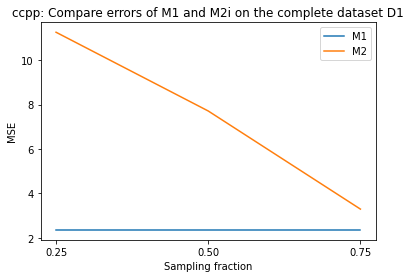

In [9]:
y_true = D1[job1.dependent_variable]

y_M1 = job1.get_predictions()
y_M2 = {}
for i,job2i in jobs2.items():
    eval_job = evaluate(dataset_name=dataset_name, dataset=D1, model=job2i.model)
    success = eval_job.wait_to_complete()
    if not success:
        print('{} failed'.format(i))
        break
    y_M2[i] = eval_job.get_predictions()

plt.plot(y_M2.keys(), [mean_squared_error(y_true, y_M1)]*3, label='M1')
plt.plot(y_M2.keys(), [mean_squared_error(y_true, y) for y in  y_M2.values()], label='M2')
plt.xticks(list(y_M2.keys()))
plt.xlabel('Sampling fraction')
plt.ylabel('MSE')
plt.legend()
plt.title('{}: Compare errors of M1 and M2i on the complete dataset D1'.format(dataset_name))

### B. Compare errors M1 and M2i on D1\D2i

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpy0dgpfri --config /tmp/tmp3vafwxz5 --output /tmp/tmpxfzmas3x --restore /tmp/tmp8n1y0d3k (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:12 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpy0dgpfri --config /tmp/tmp3vafwxz5 --output /tmp/tmpxfzmas3x --restore /tmp/tmp8n1y0d3k 2021-03-05 14:12:26,705277 UTC [31782] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:12:26,705350 UTC [31782] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:12:26,705364 UTC [31782] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:12:26,705780 UTC [31782] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:12:26,707920 UTC [31782] DEBUG CDataFrameAnalyzer.cc@104 Received 2144 rows 2021-03-05 14:12:28,897540 UTC [31782] DEBUG CStateDecompressor.cc@168 Explicit end-of-stream marker found in document with index 1 2021-03-05 14:12:29,554332 UTC [31782] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:12:30,339911 UTC [31782] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":22200141} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":11864468} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":3000} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":250} ] 2021-03-05 14:12:30,339954 UTC [31782] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:12 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":483.6461791992187 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":443.3855285644531 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":452.6561584472656 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":473.5947875976562 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":478.2857055664062 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":438.8918762207031 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":439.0918884277344 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":477.8826293945312 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


Text(0.5, 1.0, 'ccpp: Compare errors M1 and M2i on D1\\D2i')

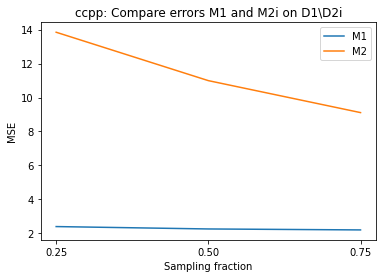

In [10]:
ds1 = set([tuple(line) for line in D1.values])
D1notD2 = {}
for key,D2i in D2.items():
    ds2 = set([tuple(line) for line in D2i.values])
    D1notD2[key] = pd.DataFrame(list(ds1.difference(ds2)), columns=D1.columns)

y_M1 = {}
y_M2 = {}
for key,job2i in jobs2.items():
    eval_job = evaluate(dataset_name=dataset_name, dataset=D1notD2[key], model=job1.model)
    success = eval_job.wait_to_complete()
    if not success:
        print('M1 evaluation for {} failed'.format(key))
        break
    y_M1[key] = eval_job.get_predictions()
    
    eval_job = evaluate(dataset_name=dataset_name, dataset=D1notD2[key], model=job2i.model)
    success = eval_job.wait_to_complete()
    if not success:
        print('M2 evaluation for {} failed'.format(key))
        break
    y_M2[key] = eval_job.get_predictions()

plt.plot(y_M1.keys(), [mean_squared_error(D1notD2[k][job1.dependent_variable], y) for k, y in  y_M1.items()], 
         label='M1')
plt.plot(y_M2.keys(), [mean_squared_error(D1notD2[k][job1.dependent_variable], y) for k, y in  y_M2.items()], 
         label='M2')
plt.xticks(list(y_M2.keys()))
plt.xlabel('Sampling fraction')
plt.ylabel('MSE')
plt.legend()
plt.title('{}: Compare errors M1 and M2i on D1\\D2i'.format(dataset_name))

### C. Compare errors on the test dataset (D0)

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpo9cd6hu0 --config /tmp/tmp077nev9z --output /tmp/tmp_xiolna4 --restore /tmp/tmpqeydqodi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:12 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpo9cd6hu0 --config /tmp/tmp077nev9z --output /tmp/tmp_xiolna4 --restore /tmp/tmpqeydqodi 2021-03-05 14:12:54,031831 UTC [5751] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:12:54,031895 UTC [5751] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:12:54,031914 UTC [5751] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:12:54,032297 UTC [5751] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:12:54,034516 UTC [5751] DEBUG CDataFrameAnalyzer.cc@104 Received 953 rows 2021-03-05 14:12:55,858888 UTC [5751] DEBUG CStateDecompressor.cc@168 Explicit end-of-stream marker found in document with index 1 2021-03-05 14:12:56,134544 UTC [5751] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:12:57,743846 UTC [5751] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":18607436} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":10383392} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":2176} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":250} ] 2021-03-05 14:12:57,743944 UTC [5751] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:12 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":432.7692260742187 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.1124877929687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":460.7373352050781 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":464.3152160644531 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":447.8741149902344 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":465.9892578125,""i ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":465.9057922363281 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":461.6562805175781 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


Text(0.5, 1.0, 'ccpp: Compare errors on the test dataset (D0)')

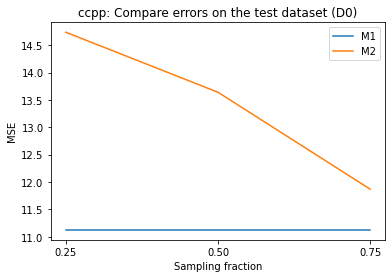

In [11]:
y_true = D0[job1.dependent_variable]

eval_job = evaluate(dataset_name=dataset_name, dataset=D0, model=job1.model)
success = eval_job.wait_to_complete()
y_M1 = eval_job.get_predictions()

y_M2 = {}
for i,job2i in jobs2.items():
    eval_job = evaluate(dataset_name=dataset_name, dataset=D0, model=job2i.model)
    success = eval_job.wait_to_complete()
    if not success:
        print('{} failed'.format(i))
        break
    y_M2[i] = eval_job.get_predictions()

plt.plot(y_M2.keys(), [mean_squared_error(y_true, y_M1)]*3, label='M1')
plt.plot(y_M2.keys(), [mean_squared_error(y_true, y) for y in  y_M2.values()], label='M2')
plt.xticks(list(y_M2.keys()))
plt.xlabel('Sampling fraction')
plt.ylabel('MSE')
plt.legend()
plt.title('{}: Compare errors on the test dataset (D0)'.format(dataset_name))